#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   name      1306 non-null   object 
 2   sex       1306 non-null   object 
 3   age       1043 non-null   float64
 4   sibsp     1306 non-null   int64  
 5   parch     1306 non-null   int64  
 6   ticket    1306 non-null   object 
 7   fare      1306 non-null   float64
 8   embarked  1306 non-null   object 
 9   survived  1306 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.2+ KB


<Axes: >

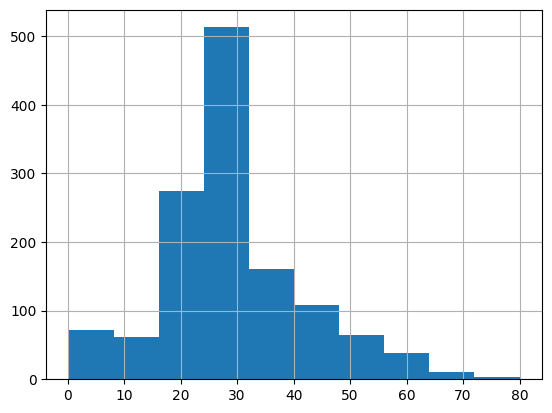

In [1]:
import pandas as pd

url = "data/titanic.csv"
df = pd.read_csv(url)


df = df.drop("cabin", axis=1)
df = df[~df.embarked.isna()]
df = df[~df.fare.isna()]

df.info()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(df[['age']])
X = imputer.fit_transform(df[['age']])
df['age']=X[:,0]
df.age.hist()

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [38]:
from sklearn.preprocessing import OneHotEncoder

data = df[["sex", "age", "sibsp", "parch", "embarked", "survived"]]
ohe = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = ohe.fit_transform(data[["sex", "embarked"]])
df_encoded

data[ohe.get_feature_names_out()] = encoded_df

df_encoded = encoded_df.drop(["sex", "embarked"], axis=1)


NameError: name 'encoded_df' is not defined

#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression()
X = df_encoded.drop("survived", axis=1)
y = df_encoded['survived']

result=cross_val_score(lr,X,y,cv=5)

np.mean(result)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
X = df_encoded.drop("survived", axis=1)
y = df_encoded['survived']

result=cross_val_score(lr,X,y,cv=5)

np.mean(result)

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?